# Load the libraries

In [6]:
import numpy as np
import cv2 as cv
%matplotlib inline
from matplotlib import pyplot as plt

# Take first frame of the video

In [7]:
cap = cv.VideoCapture('slow_traffic_small.mp4')
ret,frame = cap.read()
frame.shape

(360, 640, 3)

# Contour to detect the white car

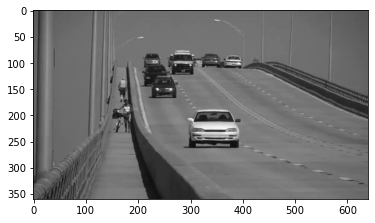

In [8]:
#Convert into gray scale image
img_grey = cv.cvtColor(frame,cv.COLOR_BGR2GRAY)
plt.imshow(img_grey,cmap = 'gray')
plt.show()

In [9]:
#set a thresh
thresh = 230
#get threshold image
ret,thresh_img = cv.threshold(img_grey, thresh, 255, cv.THRESH_BINARY)
#find contours
contours, hierarchy = cv.findContours(thresh_img, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


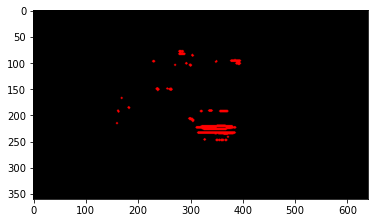

In [10]:
#create an empty image for contours
img_contours = np.zeros(frame.shape)
# draw the contours on the empty image
cv.drawContours(img_contours, contours, -1, (255,0,0), 3)
#save image
plt.imshow(img_contours)
plt.show()

In [11]:
#Identify the contouur which has maximum area 
max_contour = contours[0]
for contour in contours:
    if cv.contourArea(contour)>cv.contourArea(max_contour):
        max_contour=contour

    contour=max_contour
    approx=cv.approxPolyDP(contour, 0.1*cv.arcLength(contour,True),True)
    x,y,w,h=cv.boundingRect(approx)

# Mark the region of interest(ROI)

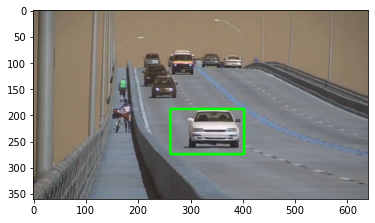

In [12]:
# estimate the boundaries points
x1, y1, x2, y2 = x-50,y-35,x+w+20,y+h+50
cv.rectangle(frame,(x1,y1),(x2,y2),(0,255,0),4)
plt.imshow(frame)
    

# Calculate the histogram of the ROI

In [16]:
track_window = (x1,y1,x2,y2)
roi = frame[y1:y2, x1:x2]
hsv_roi =  cv.cvtColor(roi, cv.COLOR_BGR2HSV)
mask = cv.inRange(hsv_roi, np.array((0., 60.,32.)), np.array((180.,255.,255.)))
roi_hist = cv.calcHist([hsv_roi],[0],mask,[180],[0,180])
cv.normalize(roi_hist,roi_hist,0,255,cv.NORM_MINMAX)

array([[  0.       ],
       [  0.       ],
       [  0.       ],
       [  3.3116884],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [ 23.18182  ],
       [  0.       ],
       [  0.       ],
       [  9.935065 ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  

# Object Tracking using ROI

In [17]:
# Setup the termination criteria, either 10 iteration or move by at least 1 pt
term_crit = ( cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 20, 1 )

In [18]:
ret = True

while ret==True:
    ret, frame = cap.read()

    if ret == True:
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        #cv.calcBackProject(target_img, channels, roi_hist,ranges, scale)
        dst = cv.calcBackProject([hsv],[0],roi_hist,[0,180],1)

        # apply meanshift to get the new location
        ret, track_window = cv.meanShift(dst, track_window, term_crit)

        # Draw it on image
        x,y,w,h = track_window
        img2 = cv.rectangle(frame, (x,y), (x+w,y+h), 255,2)
        cv.imshow('img2',img2)

        k = cv.waitKey(1) 
        if k==ord("q") or ret == False: 
            break
  